In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

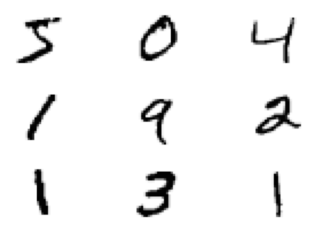

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
class Layer_Dense:
    ''' defining the weights/biases and running multilayered CNN'''
    def __init__(self,n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    ''' defining activation function to run on each node. All negatives become zero'''
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    ''' defining softmax function'''
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
class Loss:
    ''' defining CCE loss function calculations'''
    def calculate(self, output, y):
        '''output will be output from model, y the intended target values'''
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    '''
    CCE loss function inherited from base Loss class
    also handles both scaler, 1d array of [0,1], and OHC, 2d array of [[1,0],[0,1]], target classes as input
    see youtube sentdex 8/9 11:06 -  13:48 for further explanation
    '''
    def forward(self,y_pred, y_true): 
        '''y_pred model output, y_true target training class values'''
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) ==1:
            ''' then scaler values placed as class'''
            correct_confidences = y_pred_clip[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clip * y_true, axis=1)
        
        neg_log_likelihoods = -np.log(correct_confidences)
        return neg_log_likelihoods

In [6]:
xtrainF = xtrain.reshape(len(xtrain), 28*28)
xtestF = xtest.reshape(len(xtest), 28*28)

In [7]:
xtrainF.shape

(60000, 784)

In [8]:
dense1 = Layer_Dense(784,8)
activation1 = Activation_ReLU()

#input should match output of dense1, which is 3
dense2 = Layer_Dense(8,16)
activation2 = Activation_Softmax()

#running our network on X
dense1.forward(xtrainF)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

#print(activation2.output[:5])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output,ytrain)

print(f"Loss: {loss}")

Loss: 14.283100359925585
